In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

%load_ext autoreload
%autoreload 2
from trader.utils import *
from trader.tradertk import *

In [2]:
# get_x??

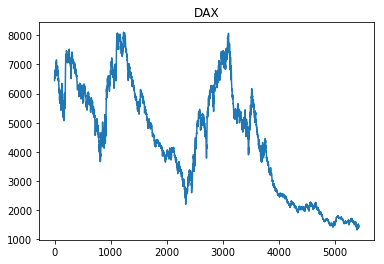

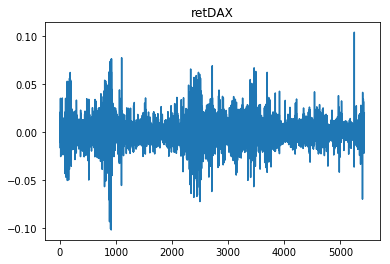

std(retDAX):  0.0147580478684


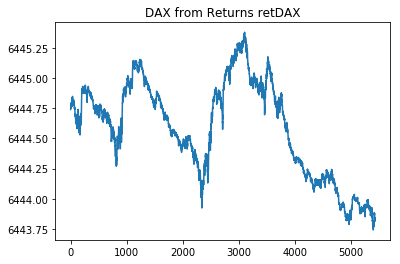

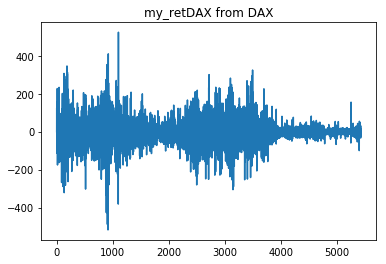

In [169]:
with open('data/retDAX.txt', 'r') as f:
    tmp = f.read()
    
retDAX = list(map(lambda x: float(x), tmp.split()))

with open('data/DAX.txt', 'r') as f:
    tmp = f.read()
    
DAX = list(map(lambda x: float(x), tmp.split()))

plt.plot(DAX)
plt.title('DAX')
plt.show()
plt.plot(retDAX)
plt.title('retDAX')
plt.show()

print('std(retDAX): ', np.std(retDAX))

tmp = [DAX[0]]
for x in retDAX:
    tmp.append(tmp[-1] + x)

plt.plot(tmp)
plt.title('DAX from Returns retDAX')
plt.show()

my_retDAX = [0]
for i in range(1, len(DAX)):
    my_retDAX.append(DAX[i] - DAX[i-1])
    
plt.plot(my_retDAX)
plt.title('my_retDAX from DAX')
plt.show()

# Here goes the main part:

In [170]:
def get_x(t, returns, w_input, X_input):
    if t > 0:
        tmp = [1]
        tmp.extend(list(reversed(returns[t-M:t+1])))
        tmp.append(traderFunction(w_input, X_input[t-1]))
    else:
        tmp = X_input[0]
    return tmp


def get_reward(t_input, r_input, F_input, miu_input, delta_input):
    if t_input > 0:
        return miu_input * ((F_input[t_input-1] * r_input[t_input]) - \
                            (delta_input * abs(F_input[t_input] - F_input[t_input-1])))
    else:
        return 0

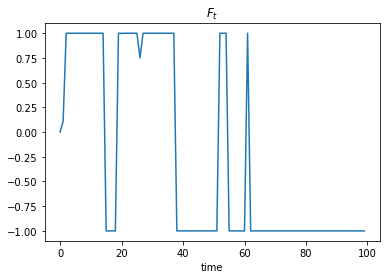

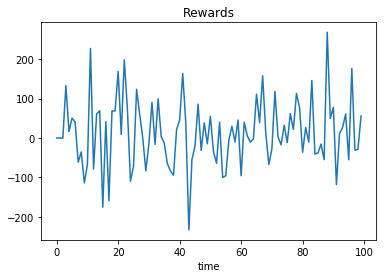

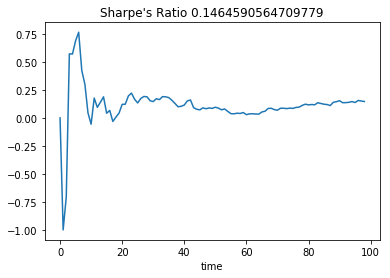

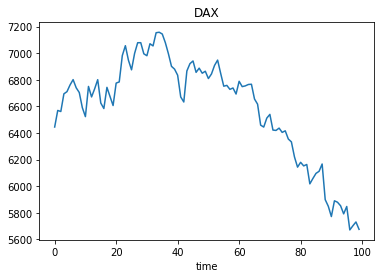

In [190]:
M = 10  # The number of time series inputs to the trader.
w = np.random.uniform(0.0, 1.0, M+3)  # initialize weights

miu = 1  # Maximum possible number of shares per transaction
delta = 0.0001  # Cost for a transaction at period t

maxT = 100

X = []

for t in range(M+1):
    tmp = [1]
    tmp.extend(list(reversed(my_retDAX[:t+1])))
    tmp.extend([0 for i in range(M-t)])
    if t == 0:
        tmp.append(0)
    else:
        tmp.append(traderFunction(w, X[t-1]))
    X.append(tmp)

for t in range(M+1, maxT):
    X.append(get_x(t, my_retDAX, w, X))
    
    
F = np.array(X)[:,M+2]

plt.plot(F)
plt.title('$F_t$')
plt.xlabel('time')
plt.show()

rewards = [get_reward(t, my_retDAX, F, miu, delta) for t in range(maxT)]

plt.plot(rewards)
plt.title('Rewards')
plt.xlabel('time')
plt.show()

srs = [sharpRatio(rewards[:t]) for t in range(1, maxT)]

plt.plot(srs)
plt.title("Sharpe's Ratio {}".format(srs[-1]))
plt.xlabel('time')
plt.show()

plt.plot(DAX[:maxT])
plt.title('DAX')
plt.xlabel('time')
plt.show()

# It's time to calculate the gradient $\frac{\partial S_t}{\partial w}$

In [182]:
# X = np.array(X)
# dFt = [(1 - (traderFunction(X[0], w) ** 2)) * X[0]]

# for t in range(maxT):
#     dFt.append((1 - (traderFunction(X[0], w) ** 2)) * (X[t] + (w[-1] * dFt[-1])))

# someT = maxT

# learning_rate = 10

# A = sum(rewards[:someT]) / someT
# B = sum(np.array(rewards[:someT]) ** 2) / someT

# dSdA = (1 / np.sqrt(B - (A ** 2))) + ((A ** 2) / (np.sqrt(B - (A ** 2)) ** 3))
# dSdB = -1 * (A / (2 * ((np.sqrt(B - (A ** 2))) ** 3)))

# grad = 0
# for t in range(1, someT):
#     dAdR = 1 / someT
#     dBdR = 2 * rewards[t] / someT
    
#     dRdFt = -1 * miu * delta * np.sign(F[t] - F[t-1])
#     dRdFtt = (miu * my_retDAX[t]) - dRdFt

#     dFtdw = dFt[t]
#     dFttdw = dFt[t-1]

#     grad += (dSdA*dAdR + dSdB*dBdR) * (dRdFt*dFtdw + dRdFtt*dFttdw)

# w_old = w.copy()
# w += learning_rate * grad  # weights update
# print(sum((w - w_old) ** 2))

# Experimenting....

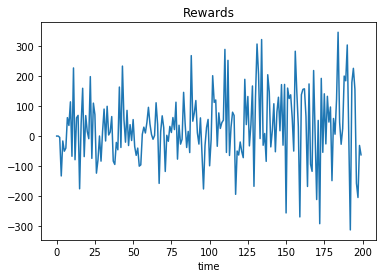

iter -> 0
Rewards: 5957.34656149996
Sharpes Ratio: 0.25956447179948167
0.00149044430963


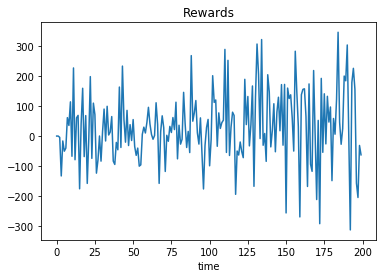

iter -> 1
Rewards: 5785.343970169762
Sharpes Ratio: 0.25054497753201566
0.00179450581945


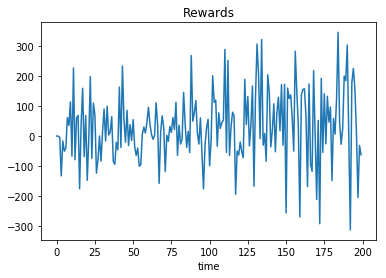

iter -> 2
Rewards: 5976.142724084167
Sharpes Ratio: 0.26066061724549816
0.00141853506068


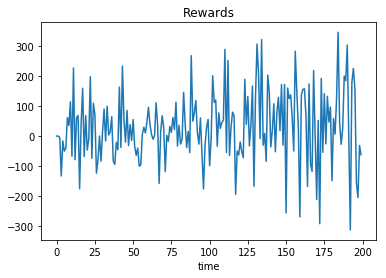

iter -> 3
Rewards: 5937.9756722027005
Sharpes Ratio: 0.2588293465213018
0.00146787428146


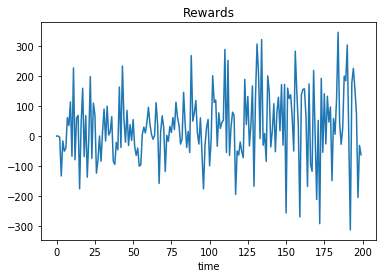

iter -> 4
Rewards: 6173.351734944517
Sharpes Ratio: 0.2697453412496243
0.00126220498204


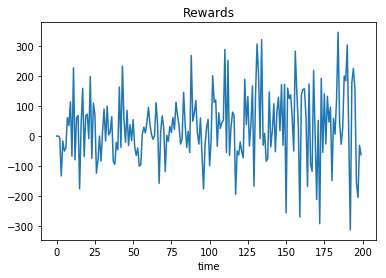

iter -> 5
Rewards: 5881.771637790581
Sharpes Ratio: 0.2576267449681347
0.00163488832754


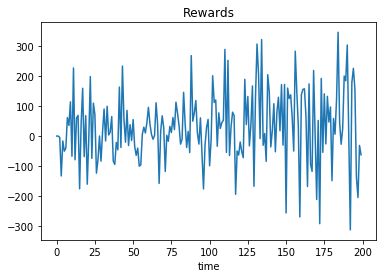

iter -> 6
Rewards: 5954.119498033497
Sharpes Ratio: 0.2584647397628001
0.00144440239517


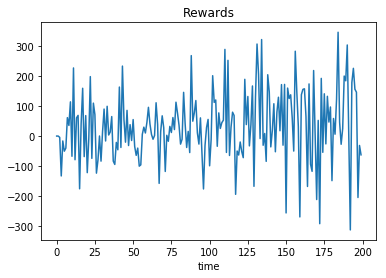

iter -> 7
Rewards: 6277.252903457568
Sharpes Ratio: 0.2737918554384979
0.001379088382


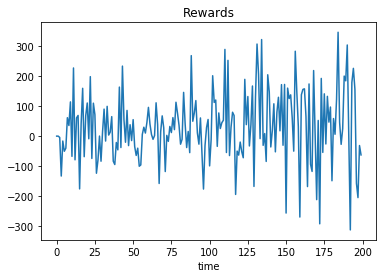

iter -> 8
Rewards: 6206.607951447624
Sharpes Ratio: 0.27049753914611124
0.00119249764368


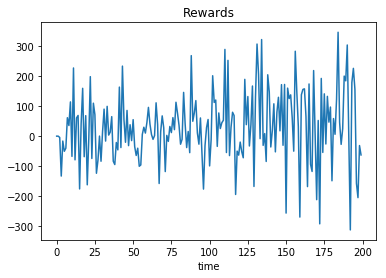

iter -> 9
Rewards: 5934.356387179443
Sharpes Ratio: 0.2572894489860959
0.00149899263601


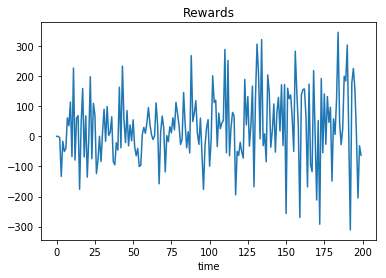

iter -> 10
Rewards: 6125.215591446063
Sharpes Ratio: 0.26770165689031017
0.00117926424624


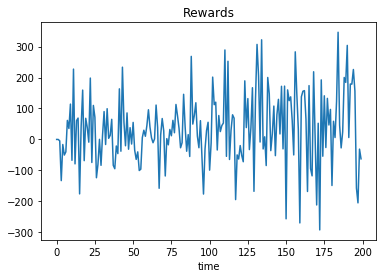

iter -> 11
Rewards: 6622.212877698093
Sharpes Ratio: 0.29421806027535163
0.00528974219927


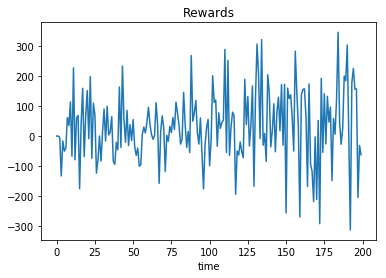

iter -> 12
Rewards: 6125.186451022293
Sharpes Ratio: 0.2661843499392694
0.00384824150158


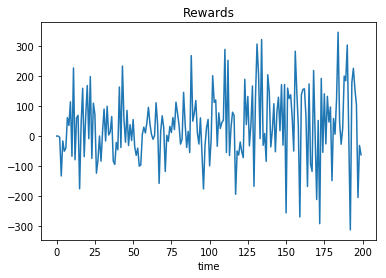

iter -> 13
Rewards: 6525.765122881164
Sharpes Ratio: 0.2852214102729249
0.00106699435707


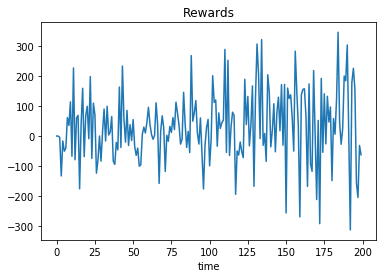

iter -> 14
Rewards: 6195.078332287777
Sharpes Ratio: 0.27006652954106064
0.00118972466852


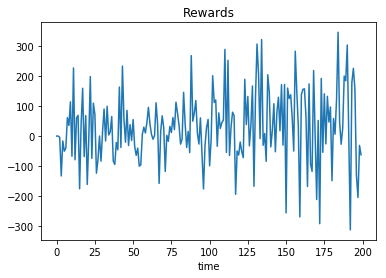

iter -> 15
Rewards: 5959.614230186121
Sharpes Ratio: 0.2587842720747489
0.00142013666015


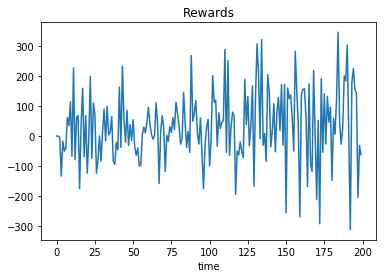

iter -> 16
Rewards: 6271.9969400212285
Sharpes Ratio: 0.27358577060590983
0.00136254122811


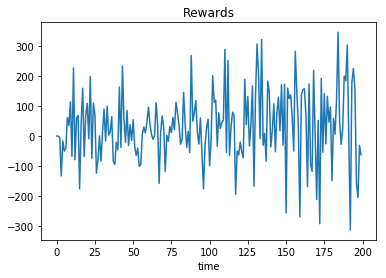

iter -> 17
Rewards: 6183.1657874810735
Sharpes Ratio: 0.2698300469372374
0.00117560559335


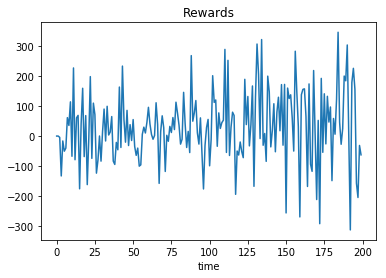

iter -> 18
Rewards: 5929.200879671425
Sharpes Ratio: 0.2571335729179851
0.00148845136883


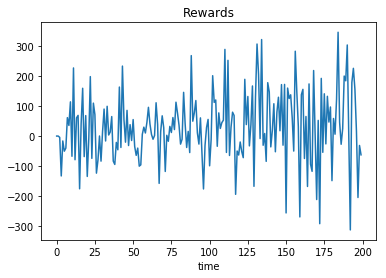

iter -> 19
Rewards: 5876.209517745243
Sharpes Ratio: 0.25754905752566426
0.00139544375142


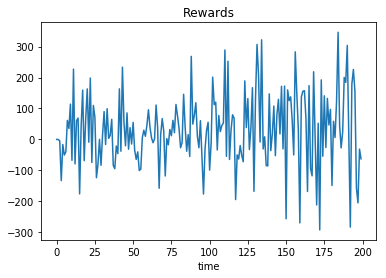

iter -> 20
Rewards: 5998.563847795001
Sharpes Ratio: 0.26272906867023743
0.00159897566843


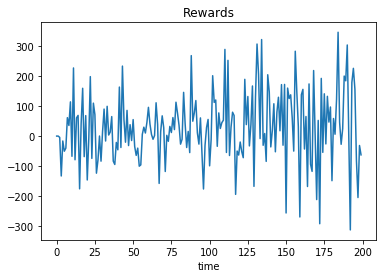

iter -> 21
Rewards: 5824.063375944008
Sharpes Ratio: 0.2543789947156599
0.00142790342906


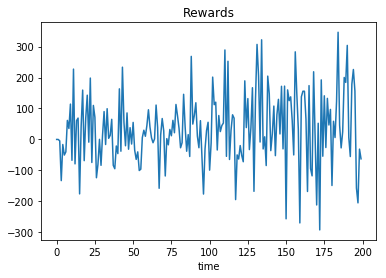

iter -> 22
Rewards: 6494.743665303719
Sharpes Ratio: 0.28863291807734565
0.00195767438445


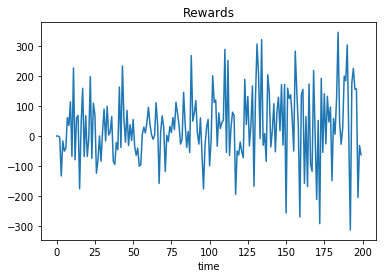

iter -> 23
Rewards: 6027.2200612541765
Sharpes Ratio: 0.26257201037256817
0.00173876844916


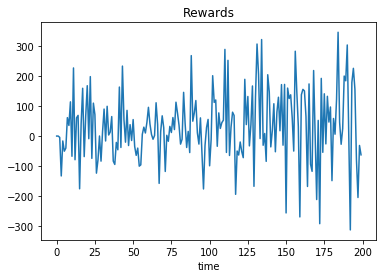

iter -> 24
Rewards: 6335.743883333659
Sharpes Ratio: 0.27672334749370875
0.000997656863819


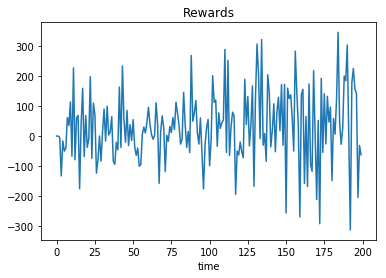

iter -> 25
Rewards: 6043.48582289646
Sharpes Ratio: 0.26367815729628974
0.00162641233815


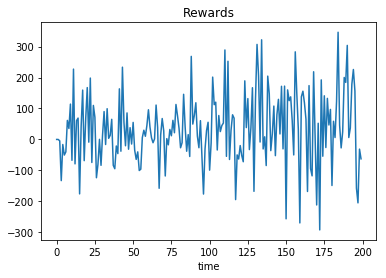

iter -> 26
Rewards: 6573.484906136497
Sharpes Ratio: 0.29263475053487314
0.00292792705284


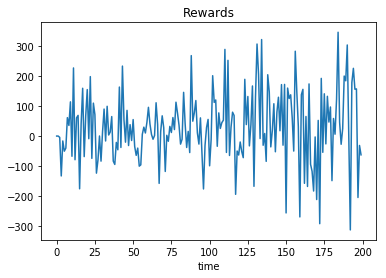

iter -> 27
Rewards: 5848.2160338640215
Sharpes Ratio: 0.25410157345399187
0.00366848286575


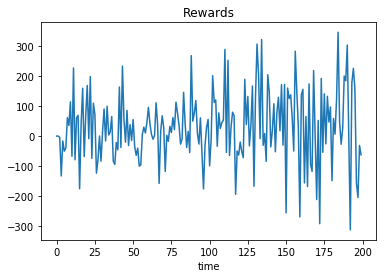

iter -> 28
Rewards: 5950.733278146533
Sharpes Ratio: 0.2579355243893677
0.00141802542033


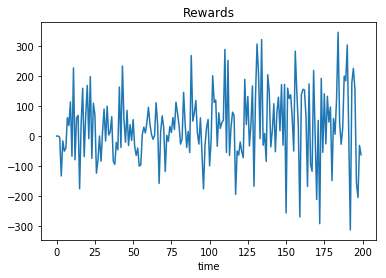

iter -> 29
Rewards: 6260.944198208753
Sharpes Ratio: 0.27223726259695374
0.00118449296397


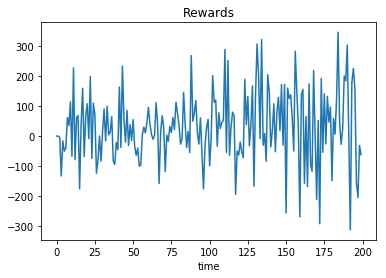

iter -> 30
Rewards: 5888.234996911841
Sharpes Ratio: 0.25585180984280786
0.00145677103841


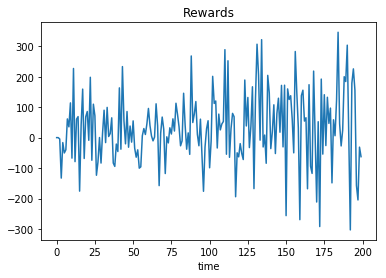

iter -> 31
Rewards: 6087.867680592556
Sharpes Ratio: 0.26661275817042074
0.00105864062686


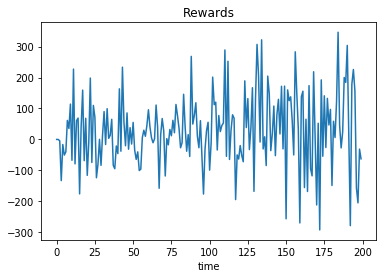

iter -> 32
Rewards: 5701.330386163311
Sharpes Ratio: 0.24819257148962048
0.0017174912639


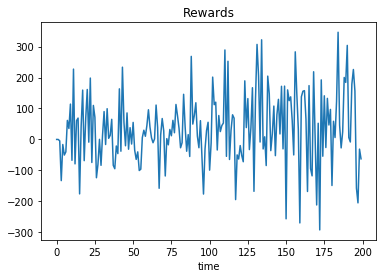

iter -> 33
Rewards: 6561.676830720351
Sharpes Ratio: 0.2916429873747448
0.00247124653279


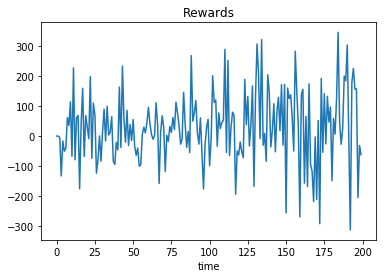

iter -> 34
Rewards: 5687.002005594959
Sharpes Ratio: 0.24716183824304125
0.00420859312169


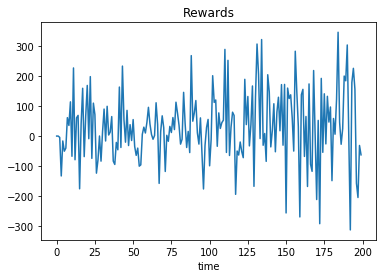

iter -> 35
Rewards: 6039.1556936932375
Sharpes Ratio: 0.2629453994388836
0.00117708518942


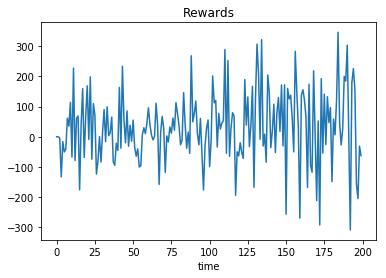

iter -> 36
Rewards: 6232.972209225807
Sharpes Ratio: 0.2715229492849735
0.00111714006676


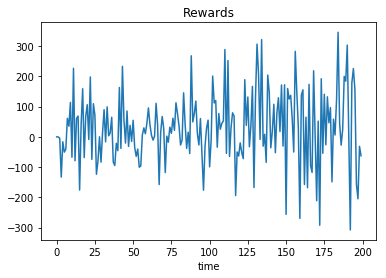

iter -> 37
Rewards: 5892.493087114769
Sharpes Ratio: 0.2562185418673563
0.00142311201499


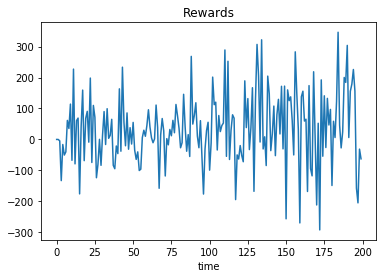

iter -> 38
Rewards: 6556.701618504853
Sharpes Ratio: 0.2922488080589995
0.00447380028973


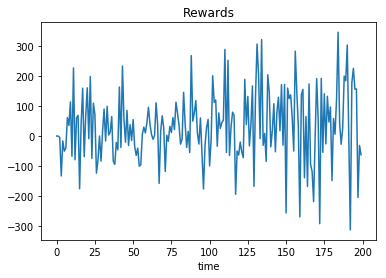

iter -> 39
Rewards: 6240.568382360421
Sharpes Ratio: 0.2720516295756199
0.00451965770494


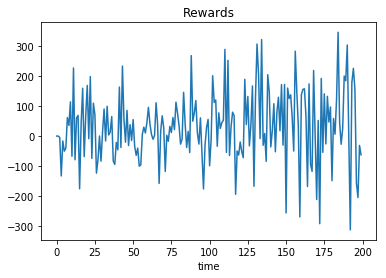

iter -> 40
Rewards: 6264.473171884126
Sharpes Ratio: 0.27234435572068466
0.00118085665893


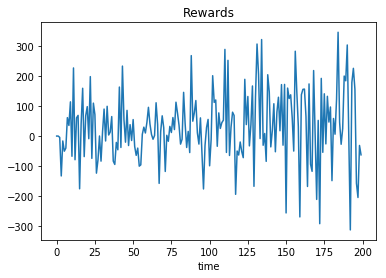

iter -> 41
Rewards: 6193.162350324787
Sharpes Ratio: 0.27001481114113357
0.00116462067259


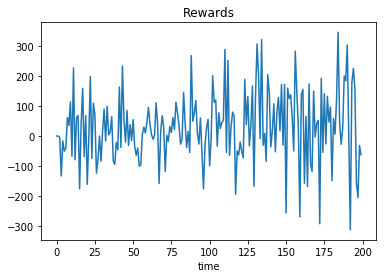

iter -> 42
Rewards: 5804.333890862848
Sharpes Ratio: 0.25455604013072125
0.00204786318001


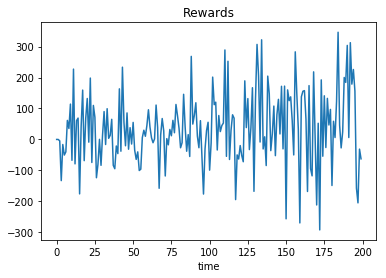

iter -> 43
Rewards: 6853.0032750608925
Sharpes Ratio: 0.3004902719148891
0.00809309193742


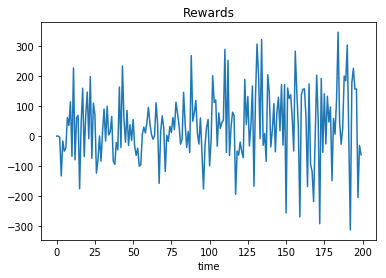

iter -> 44
Rewards: 6534.5406999722845
Sharpes Ratio: 0.28544613036556965
0.00365771554147


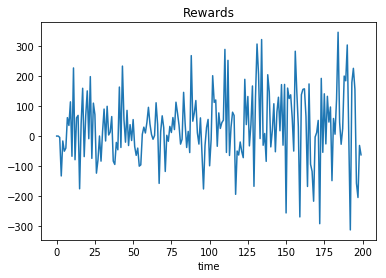

iter -> 45
Rewards: 6033.865772117567
Sharpes Ratio: 0.26420952618473353
0.00200536393474


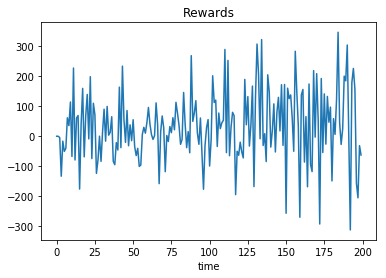

iter -> 46
Rewards: 6412.377753727625
Sharpes Ratio: 0.28069349981229624
0.00194474595457


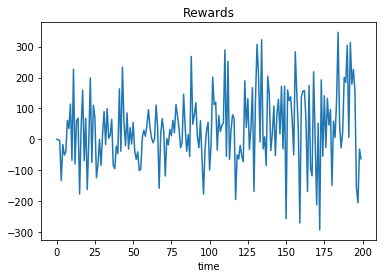

iter -> 47
Rewards: 6559.61299365499
Sharpes Ratio: 0.28618400534753957
0.00702786932069


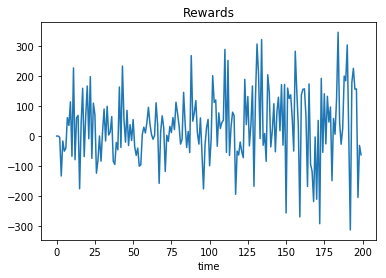

iter -> 48
Rewards: 6140.675784558641
Sharpes Ratio: 0.2666822480974173
0.00372937792398


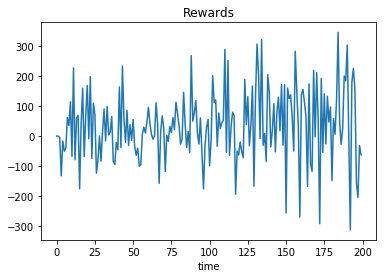

iter -> 49
Rewards: 6642.8304905533905
Sharpes Ratio: 0.2906131042461563
0.00133397811693


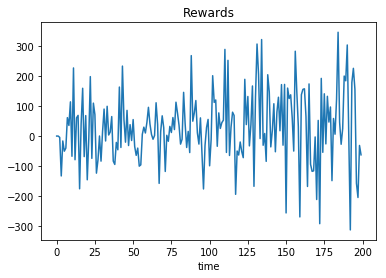

iter -> 50
Rewards: 5615.470554985529
Sharpes Ratio: 0.24451710545401947
0.00246928004875


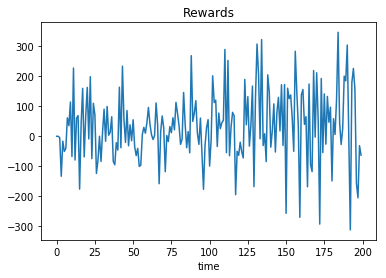

iter -> 51
Rewards: 6564.6868142231415
Sharpes Ratio: 0.2877082595916389
0.00148995141031


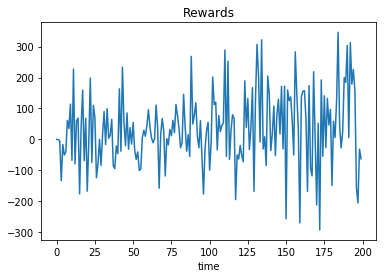

iter -> 52
Rewards: 6554.385948107828
Sharpes Ratio: 0.2858485458451607
0.00697507183609


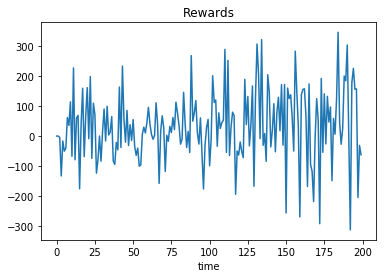

iter -> 53
Rewards: 6470.7500235379875
Sharpes Ratio: 0.2835838505831712
0.00350080365497


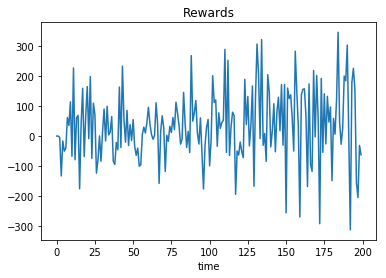

iter -> 54
Rewards: 6674.251498839102
Sharpes Ratio: 0.29171463701377676
0.00122096175012


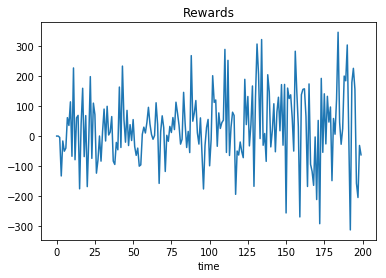

iter -> 55
Rewards: 5544.399075135933
Sharpes Ratio: 0.24036262749397222
0.00283444210957


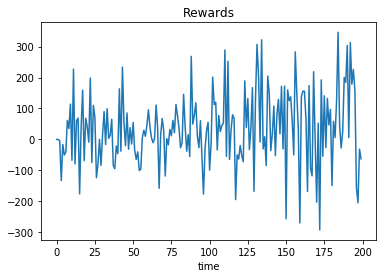

iter -> 56
Rewards: 6769.171707355156
Sharpes Ratio: 0.2976323932243179
0.00776325902657


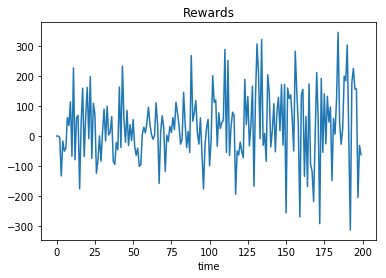

iter -> 57
Rewards: 6266.342858743842
Sharpes Ratio: 0.27287828005960496
0.00451840026828


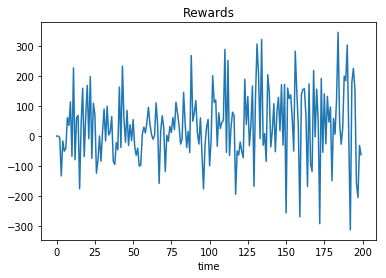

iter -> 58
Rewards: 6632.364499149536
Sharpes Ratio: 0.29056704545783957
0.00107613014903


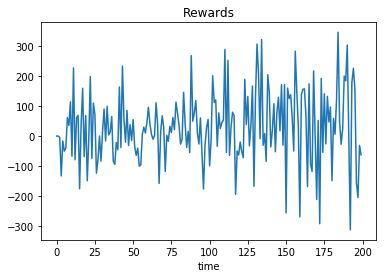

iter -> 59
Rewards: 5945.118255854764
Sharpes Ratio: 0.2579861483647083
0.00141449003292


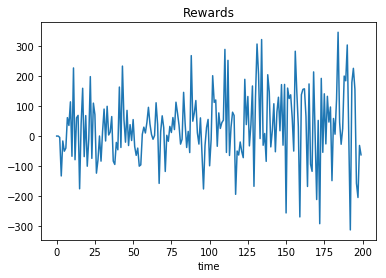

iter -> 60
Rewards: 5990.5389412352315
Sharpes Ratio: 0.2607136728933484
0.00131713787145


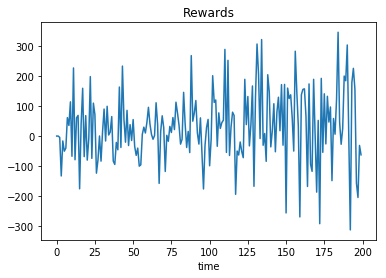

iter -> 61
Rewards: 6010.643922090253
Sharpes Ratio: 0.2627812374172148
0.00120389727196


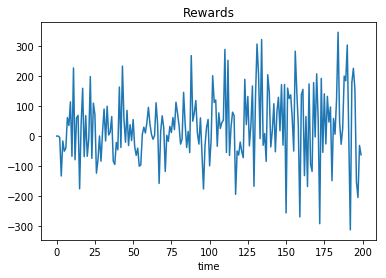

iter -> 62
Rewards: 6122.075447335313
Sharpes Ratio: 0.26827841087692766
0.00224341788405


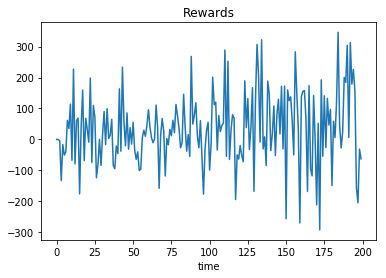

iter -> 63
Rewards: 6661.318608666671
Sharpes Ratio: 0.29420136055569235
0.00700276435911


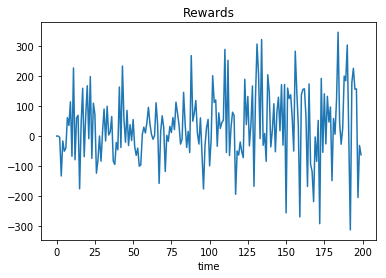

iter -> 64
Rewards: 6268.169317822695
Sharpes Ratio: 0.27444270762719186
0.00347508309095


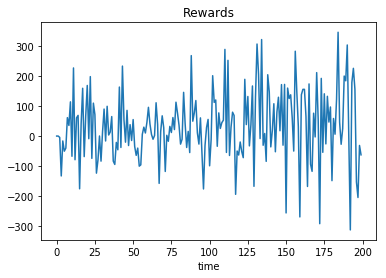

iter -> 65
Rewards: 6547.573092508652
Sharpes Ratio: 0.2878508581150283
0.00107052041908


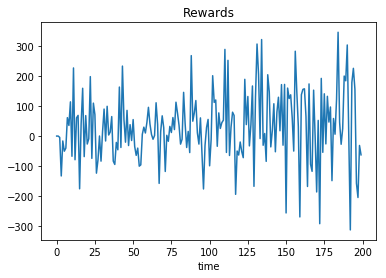

iter -> 66
Rewards: 6029.009494439036
Sharpes Ratio: 0.2645340159076647
0.00114075982829


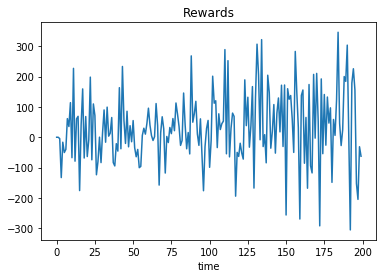

iter -> 67
Rewards: 6211.5933550985965
Sharpes Ratio: 0.2725896567143282
0.00197736371504


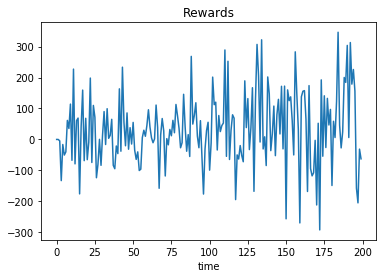

iter -> 68
Rewards: 6327.35892681751
Sharpes Ratio: 0.27843492511942614
0.00481545931303


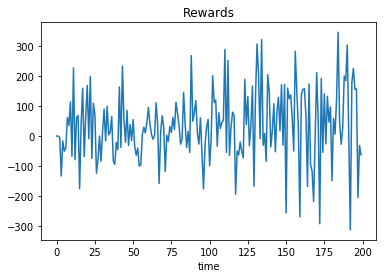

iter -> 69
Rewards: 6564.851808414658
Sharpes Ratio: 0.2863100428554462
0.00357945524697


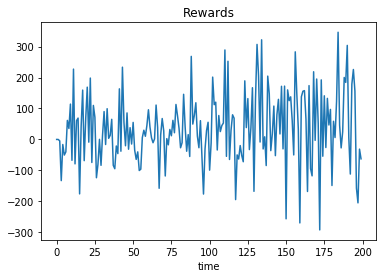

iter -> 70
Rewards: 6872.220516866789
Sharpes Ratio: 0.3060787993095169
0.00115625090027


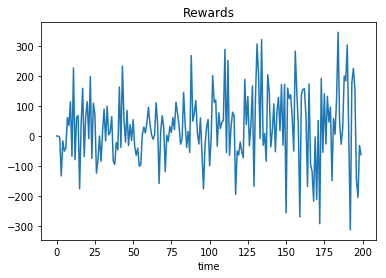

iter -> 71
Rewards: 5784.72637946373
Sharpes Ratio: 0.2512141101701076
0.00254546065232


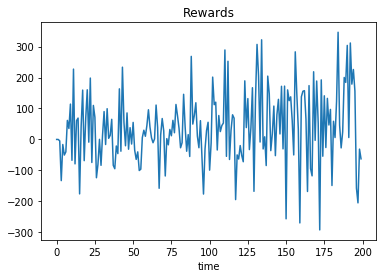

iter -> 72
Rewards: 7280.446654167123
Sharpes Ratio: 0.3210054853200225
0.007525302036


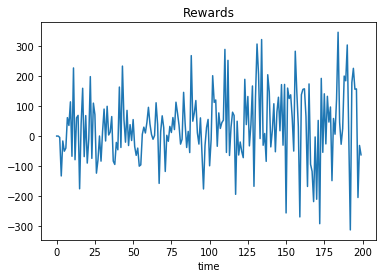

iter -> 73
Rewards: 5983.364853948934
Sharpes Ratio: 0.2604026735826291
0.00407078060456


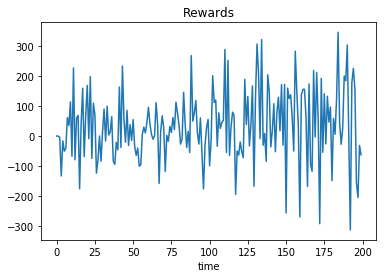

iter -> 74
Rewards: 6686.898642444089
Sharpes Ratio: 0.29207172334976633
0.00123437385687


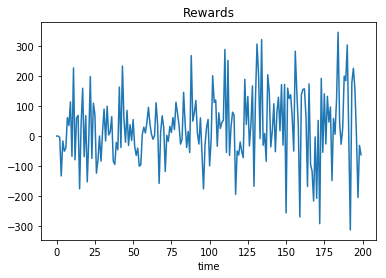

iter -> 75
Rewards: 5672.943764360039
Sharpes Ratio: 0.246730990286507
0.00338044229723


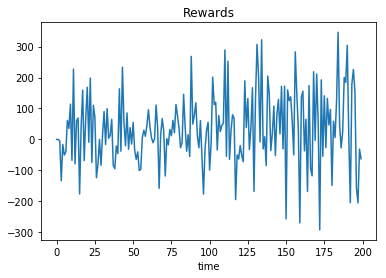

iter -> 76
Rewards: 6601.292427062648
Sharpes Ratio: 0.29238456325406637
0.00137322233298


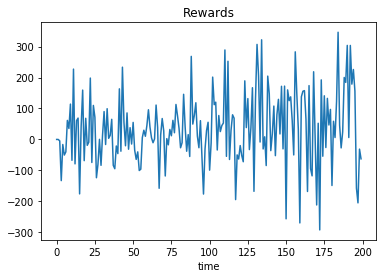

iter -> 77
Rewards: 6692.995453815244
Sharpes Ratio: 0.2941750326314421
0.00724357565591


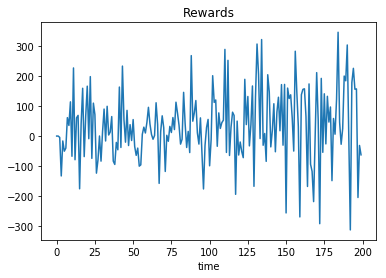

iter -> 78
Rewards: 6662.359134088203
Sharpes Ratio: 0.2909177894946742
0.00364768174412


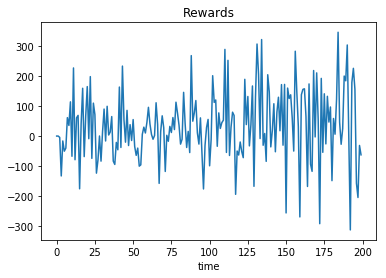

iter -> 79
Rewards: 6682.824824975321
Sharpes Ratio: 0.291923846543445
0.00122307794003


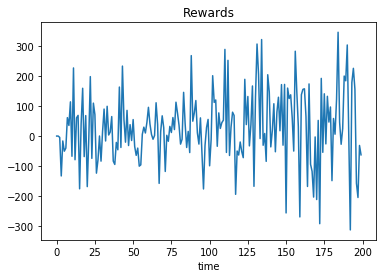

iter -> 80
Rewards: 5505.171904453573
Sharpes Ratio: 0.23795905276791252
0.00304080798303


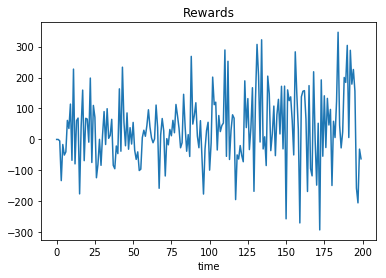

iter -> 81
Rewards: 6826.18072784689
Sharpes Ratio: 0.3021168854072699
0.00712625326283


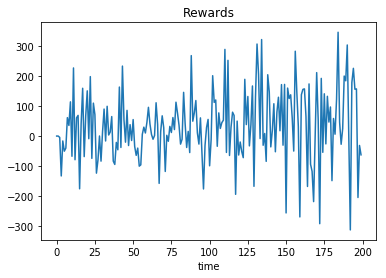

iter -> 82
Rewards: 6646.418890421921
Sharpes Ratio: 0.2904431415965865
0.00365385387132


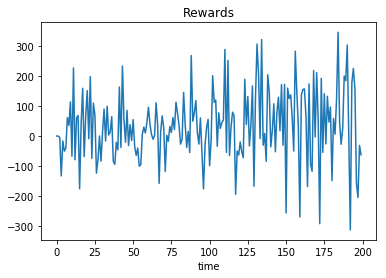

iter -> 83
Rewards: 6669.679954664973
Sharpes Ratio: 0.29152732596861725
0.00121105289216


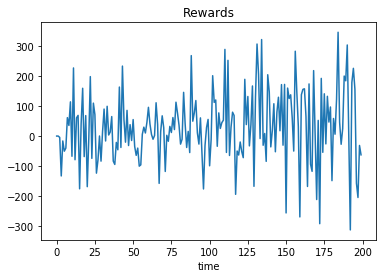

iter -> 84
Rewards: 5926.656956042519
Sharpes Ratio: 0.256822295675034
0.00142520517118


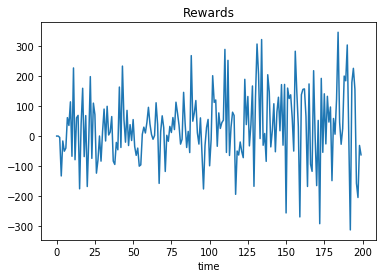

iter -> 85
Rewards: 5972.909328280613
Sharpes Ratio: 0.2597898900079007
0.00127832350363


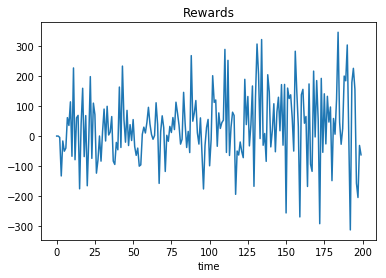

iter -> 86
Rewards: 6209.795842807656
Sharpes Ratio: 0.2715957500715151
0.00154118009218


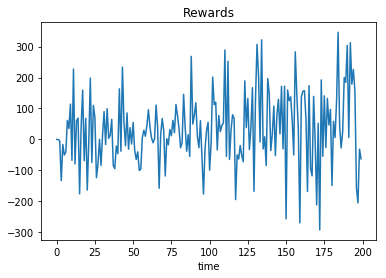

iter -> 87
Rewards: 6469.539497112826
Sharpes Ratio: 0.28364236363804024
0.00615740852139


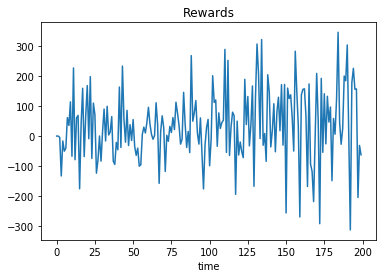

iter -> 88
Rewards: 6661.675206177684
Sharpes Ratio: 0.29090982516563724
0.00361280476953


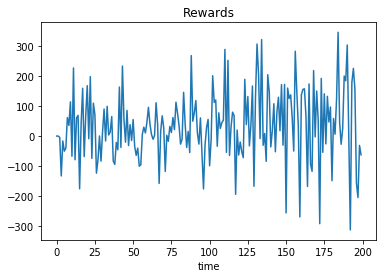

iter -> 89
Rewards: 6695.05310774782
Sharpes Ratio: 0.29375846665905636
0.000980706052987


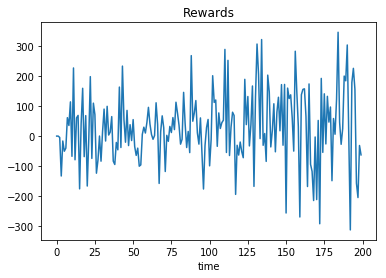

iter -> 90
Rewards: 5514.50408606579
Sharpes Ratio: 0.23830521894899345
0.00305916510416


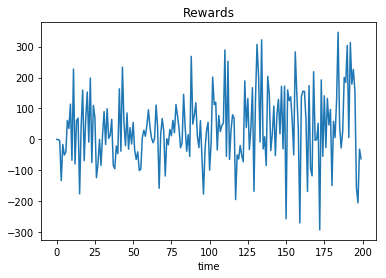

iter -> 91
Rewards: 7082.387118956241
Sharpes Ratio: 0.31375278912673277
0.00767928817965


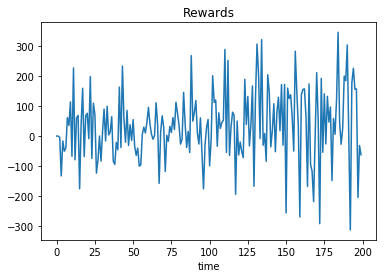

iter -> 92
Rewards: 6571.465939414667
Sharpes Ratio: 0.2878422135957724
0.00370520494329


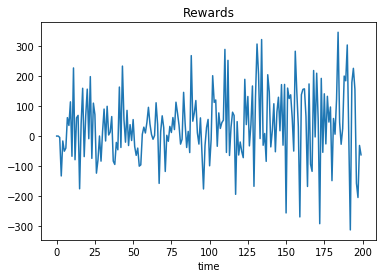

iter -> 93
Rewards: 6771.267826431157
Sharpes Ratio: 0.2962717510887244
0.00113367724806


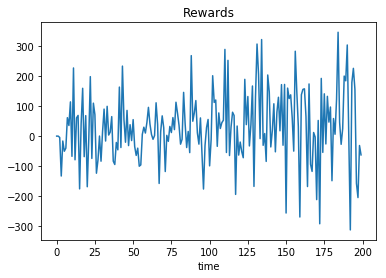

iter -> 94
Rewards: 5803.4308125780535
Sharpes Ratio: 0.2534945023319662
0.00172688979441


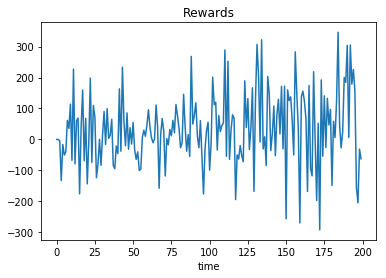

iter -> 95
Rewards: 6548.554474384074
Sharpes Ratio: 0.28709327168393245
0.00655310344069


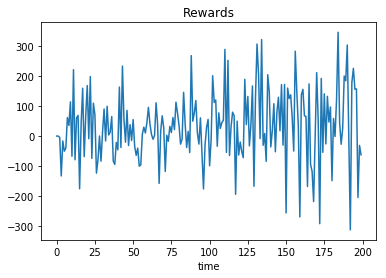

iter -> 96
Rewards: 6560.824596277497
Sharpes Ratio: 0.2873491393628328
0.00378778363864


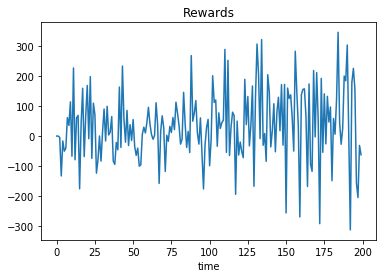

iter -> 97
Rewards: 6787.040869712358
Sharpes Ratio: 0.2967420940638999
0.00114678316828


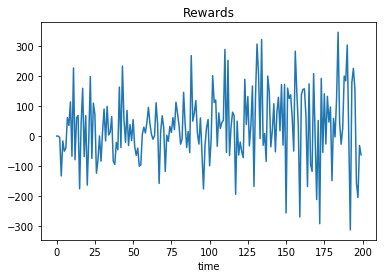

iter -> 98
Rewards: 6008.002692476976
Sharpes Ratio: 0.26092623311700286
0.0012855565324


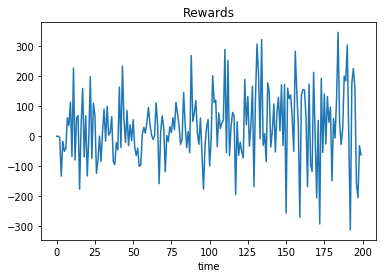

iter -> 99
Rewards: 6021.689804531212
Sharpes Ratio: 0.26253337156213047
0.00118795656081


In [186]:
sums_rew = []
last_srs = []

for iterr in range(100):
    X = []

    for t in range(M+1):
        tmp = [1]
        tmp.extend(list(reversed(my_retDAX[:t+1])))
        tmp.extend([0 for i in range(M-t)])
        if t == 0:
            tmp.append(0)
        else:
            tmp.append(traderFunction(w, X[t-1]))
        X.append(tmp)

    for t in range(M+1, maxT):
        X.append(get_x(t, my_retDAX, w, X))

    F = np.array(X)[:,M+2]

    rewards = [get_reward(t, my_retDAX, F, miu, delta) for t in range(maxT)]

    plt.plot(rewards)
    plt.title('Rewards')
    plt.xlabel('time')
    plt.show()

    srs = [sharpRatio(rewards[:t]) for t in range(1, maxT)]

#     plt.plot(srs)
#     plt.title("Sharpe's Ratio")
#     plt.xlabel('time')
#     plt.show()

    X = np.array(X)
    dFt = [(1 - (traderFunction(X[0], w) ** 2)) * X[0]]

    for t in range(maxT):
        dFt.append((1 - (traderFunction(X[0], w) ** 2)) * (X[t] + (w[-1] * dFt[-1])))

    someT = maxT

    learning_rate = 0.01

    A = sum(rewards[:someT]) / someT
    B = sum(np.array(rewards[:someT]) ** 2) / someT

    dSdA = (1 / np.sqrt(B - (A ** 2))) + ((A ** 2) / (np.sqrt(B - (A ** 2)) ** 3))
    dSdB = -1 * (A / (2 * ((np.sqrt(B - (A ** 2))) ** 3)))

    grad = 0
    for t in range(1, someT):
        dAdR = 1 / someT
        dBdR = 2 * rewards[t] / someT

        dRdFt = -1 * miu * delta * np.sign(F[t] - F[t-1])
        dRdFtt = (miu * my_retDAX[t]) - dRdFt

        dFtdw = dFt[t]
        dFttdw = dFt[t-1]

        grad += (dSdA*dAdR + dSdB*dBdR) * (dRdFt*dFtdw + dRdFtt*dFttdw)

    w_old = w.copy()
    w += learning_rate * grad  # weights update
    
    sums_rew.append(sum(rewards)) 
    last_srs.append(srs[-1])
    
    print('iter -> {}'.format(iterr))
    print('Rewards: {}'.format(sum(rewards)))
    print('Sharpes Ratio: {}'.format(srs[-1]))
    print(sum((w - w_old) ** 2))

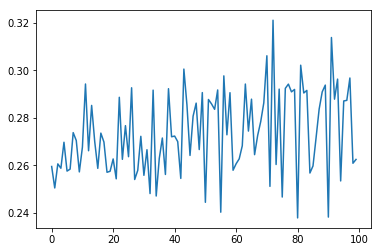

In [187]:
plt.plot(last_srs)

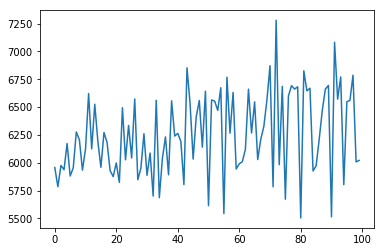

In [188]:
plt.plot(sums_rew)

In [8]:
with open('data/retDAX.txt', 'r') as f:
    tmp = f.read()
    
retDAX = list(map(lambda x: float(x), tmp.split()))

with open('data/DAX.txt', 'r') as f:
    tmp = f.read()
    
DAX = list(map(lambda x: float(x), tmp.split()))

#
# testDAX.m goes here
#

M = 10  # The number of time series inputs to the trader.
T = 500
N = 100

initial_theta = np.ones((M+2, 1))  # Initialize theta.

X = retDAX

Xn = featureNormalize(X)

# [theta, cost, EXITFLAG,OUTPUT] = fminunc(@(t)(costFunction(Xn(1:M+T), X(1:M+T), t)), initial_theta, options)

def costF(t):
    return costFunction(Xn[:M+T], X[:M+T], t)

minimize(costF, initial_theta)

# Ft = updateFt(Xn[:M+T], theta, T)


# # Ft = np.zeros((T+1, 1))
# # Ft = np.ones(T+1)  # Holdings at period t.


# miu = 1  # maximum possible number of shares per transaction
# delta = 0.001  # The cost for a transaction at period t

# Ret, sharp = rewardFunction(X, miu, delta, Ft, M)

[[ 0.10045591  0.10072639  0.10018872 ...,  0.09963479  0.10087404
   0.10049991]
 [ 0.10045591  0.10072639  0.10018872 ...,  0.09963479  0.10087404
   0.10049991]
 [ 0.10045591  0.10072639  0.10018872 ...,  0.09963479  0.10087404
   0.10049991]
 ..., 
 [ 0.10045591  0.10072639  0.10018872 ...,  0.09963479  0.10087404
   0.10049991]
 [ 0.10045591  0.10072639  0.10018872 ...,  0.09963479  0.10087404
   0.10049991]
 [ 0.10045591  0.10072639  0.10018872 ...,  0.09963479  0.10087404
   0.10049991]]
(10, 500)
(6000, 10)
(12, 12)
(12, 12)


ValueError: shapes (6000,10) and (12,12) not aligned: 10 (dim 1) != 12 (dim 0)

In [ ]:
def getNumericalGradient()

In [ ]:
def get_F(r, w):
    T = len(r)
    F = np.zeros(T)
    for t in range(1, T):
        x = np.hstack((1, r[t], F[t-1]))
        #print 'x: ', x.shape
        #print 'w: ', w.shape

        F[t] = np.tanh(np.dot(w, x))
    return F


def get_grad(r, w):
    eta = 0.5
    mu = 1
    delta = 0.001
    T = len(r)

    F = get_F(r, w)
#     R = get_return(r, F)
    R = rewardFunction(X, miu, delta, Ft, M)[0]
    A = 0
    B = 0
    T = len(R)
    for t in range(T - 1):
        A = A + eta * (R[t] - A)
        B = B + eta * (R[t]**2 - B)

    dDdR = (B  - A * R[T-1]) / (B - A**2)**(3/2)

    prefix = np.array([dDdR] * (T-1))

    dF = np.zeros([3, T])
    for t in range(1, T):
        xt = np.hstack((1, r[t], F[t-1]))
        dF[:,t] = (1 - np.tanh(np.dot(w, xt)) ** 2) * (xt + w[2] * dF[:,t-1])


    dRtFt = (-1) * mu * delta * np.sign(F[1:T] - F[0:T-1])
    dRtFtt = mu * r[1:T] + mu * delta * np.sign(F[1:T] - F[0:T-1])

    grad = np.sum(np.array([prefix] * 3) * (np.array([dRtFt] * 3) * dF[:, 1:T] +
                                            np.array([dRtFtt] * 3) * dF[:, 0:T-1]), axis=1)
    return grad


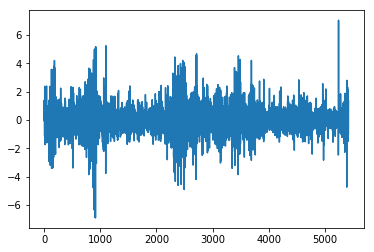

In [10]:
plt.plot(Xn)

In [9]:
# initial_theta = np.ones((M+2, 1))

tmp = costFunction(X, Xn, np.random.uniform(-1,1,(M+2, 1)))
tmp

[[ 8.29450156  7.84888441  8.73476943 ...,  8.29665594  8.20674132
   9.4075615 ]
 [ 8.29450156  7.84888441  8.73476943 ...,  8.29665594  8.20674132
   9.4075615 ]
 [ 8.29450156  7.84888441  8.73476943 ...,  8.29665594  8.20674132
   9.4075615 ]
 ..., 
 [ 8.29450156  7.84888441  8.73476943 ...,  8.29665594  8.20674132
   9.4075615 ]
 [ 8.29450156  7.84888441  8.73476943 ...,  8.29665594  8.20674132
   9.4075615 ]
 [ 8.29450156  7.84888441  8.73476943 ...,  8.29665594  8.20674132
   9.4075615 ]]
(10, 5415)
(64980, 10)
(12, 12)
(12, 12)


ValueError: shapes (64980,10) and (12,12) not aligned: 10 (dim 1) != 12 (dim 0)

In [55]:
np.tile([1,2,3], (M,1))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])